<a href="https://colab.research.google.com/github/faseenafarz/machine-learning/blob/main/cyber_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HIKARI-2021: Generating Network Intrusion Detection Dataset Based on Real and Encrypted Synthetic Attack Traffic

Description
Available datasets from the paper Generating Encrypted Network Traffic for Intrusion Detection Datasets.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Read the dataset
df=pd.read_csv('/content/ALLFLOWMETER_HIKARI2021.csv')
#display the first 5 rows
df.head()

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200.0,65160.0,0.0,Bruteforce-XML,1.0
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200.0,65160.0,0.0,Bruteforce-XML,1.0
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200.0,65160.0,0.0,Bruteforce-XML,1.0
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200.0,65160.0,0.0,Bruteforce-XML,1.0
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200.0,65160.0,0.0,Bruteforce-XML,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171274 entries, 0 to 171273
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              171274 non-null  int64  
 1   Unnamed: 0                171274 non-null  int64  
 2   uid                       171274 non-null  object 
 3   originh                   171274 non-null  object 
 4   originp                   171274 non-null  int64  
 5   responh                   171274 non-null  object 
 6   responp                   171274 non-null  int64  
 7   flow_duration             171274 non-null  float64
 8   fwd_pkts_tot              171274 non-null  int64  
 9   bwd_pkts_tot              171274 non-null  int64  
 10  fwd_data_pkts_tot         171274 non-null  int64  
 11  bwd_data_pkts_tot         171274 non-null  int64  
 12  fwd_pkts_per_sec          171274 non-null  float64
 13  bwd_pkts_per_sec          171274 non-null  f

In [3]:
df['Label'].value_counts()

0.0    160244
1.0     11029
Name: Label, dtype: int64

In [4]:
print("Total number  of samples:", df.shape[0], "\n")

# Sample distribution by class -> An unknown symbol was found in label names
df.groupby(['traffic_category']).size()

Total number  of samples: 171274 



traffic_category
Background        160244
Bruteforce          5884
Bruteforce-XML      5145
dtype: int64

In [6]:
# Here background data are get label as 1 that means there is mild or no attacks ,label as 1 means attack

<Axes: >

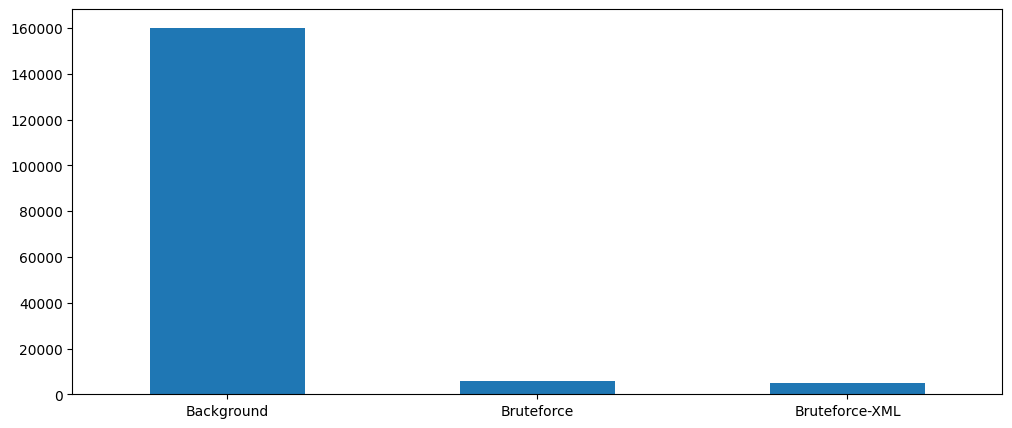

In [7]:
# Bar graph for sample distribution by class

df['traffic_category'].value_counts().plot(kind='bar', figsize=(12,5), rot=0)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(171273, 88)

In [10]:
df.isna().sum()

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

In [11]:
df.drop(['Unnamed: 0.1','Unnamed: 0','uid','originh','responh'],axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['traffic_category']=lab.fit_transform(df['traffic_category'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171273 entries, 0 to 171272
Data columns (total 83 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   originp                   171273 non-null  int64  
 1   responp                   171273 non-null  int64  
 2   flow_duration             171273 non-null  float64
 3   fwd_pkts_tot              171273 non-null  int64  
 4   bwd_pkts_tot              171273 non-null  int64  
 5   fwd_data_pkts_tot         171273 non-null  int64  
 6   bwd_data_pkts_tot         171273 non-null  int64  
 7   fwd_pkts_per_sec          171273 non-null  float64
 8   bwd_pkts_per_sec          171273 non-null  float64
 9   flow_pkts_per_sec         171273 non-null  float64
 10  down_up_ratio             171273 non-null  float64
 11  fwd_header_size_tot       171273 non-null  int64  
 12  fwd_header_size_min       171273 non-null  int64  
 13  fwd_header_size_max       171273 non-null  i

In [14]:
## Splitting features and target from dataset
x = df.drop('Label', axis=1)
y = df['Label']

x.shape
y.shape

(171273, 82)

(171273,)

In [15]:
#Training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
r_scaler=StandardScaler()
r_scaler.fit(x_train)
x_train=r_scaler.transform(x_train)
x_test=r_scaler.transform(x_test)

StandardScaler()

In [17]:
# finding the correlation matrix
correlation_matrix = df.corr()
correlation_matrix.head()


,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
originp,1.000000,0.286621,-0.032301,-0.006450,-0.004953,-0.030077,-0.003054,0.134639,0.148452,0.142952,...,-0.133371,-0.115488,-0.030748,-0.130327,-0.018537,0.096800,-0.182697,0.211862,-0.186769,-0.152194
responp,0.286621,1.000000,-0.053898,-0.038445,-0.034838,-0.096402,-0.030931,0.714076,0.745088,0.737206,...,-0.100703,-0.115629,-0.049178,-0.113405,-0.063686,0.425472,-0.318435,0.787405,-0.129265,-0.137026
flow_duration,-0.032301,-0.053898,1.000000,0.077142,0.068632,0.181095,0.058469,-0.065069,-0.066610,-0.066539,...,0.244911,0.345202,0.998551,0.308972,0.233381,0.053057,0.113501,-0.052900,-0.011053,-0.013933
fwd_pkts_tot,-0.006450,-0.038445,0.077142,1.000000,0.998488,0.812827,0.997012,-0.039608,-0.040627,-0.040543,...,0.042297,0.091115,0.050279,0.066483,0.097380,0.063917,0.104364,-0.034631,0.014646,0.023460
bwd_pkts_tot,-0.004953,-0.034838,0.068632,0.998488,1.000000,0.809970,0.998975,-0.035694,-0.036490,-0.036476,...,0.039715,0.088006,0.042530,0.063227,0.095132,0.059835,0.099045,-0.031293,0.012374,0.020042


<Axes: >

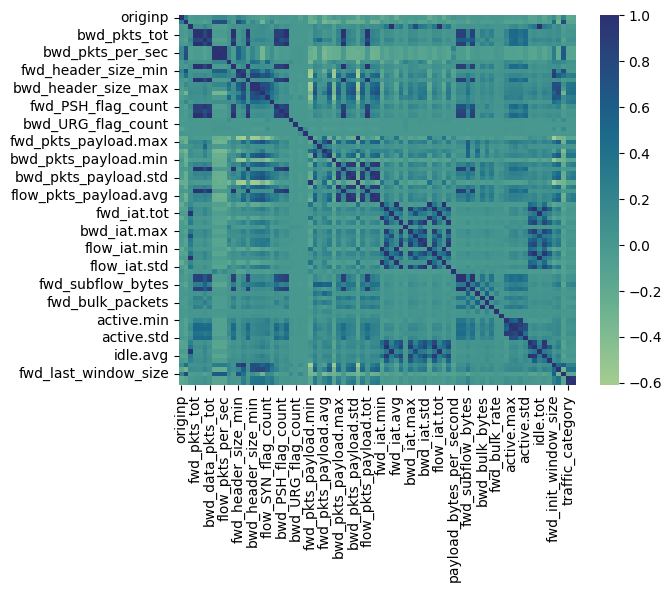

In [18]:
sns.heatmap(correlation_matrix, cmap="crest")

In [19]:
df.drop(['bwd_URG_flag_count'],axis=1)

,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,13316,443,2.207588,15,14,6,6,6.794746,6.341763,13.136509,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.0,65160.0,0.0,2,1.0
1,13318,443,15.624266,15,14,6,6,0.960045,0.896042,1.856087,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.000000e+00,29200.0,65160.0,0.0,2,1.0
2,13320,443,12.203357,14,13,6,5,1.147225,1.065281,2.212506,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.000000e+00,29200.0,65160.0,0.0,2,1.0
3,13322,443,9.992448,14,13,6,5,1.401058,1.300983,2.702041,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.000000e+00,29200.0,65160.0,0.0,2,1.0
4,13324,443,7.780611,14,14,6,5,1.799345,1.799345,3.598689,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.000000e+00,29200.0,65160.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171268,21,80,0.000036,1,1,0,0,27776.847682,27776.847682,55553.695364,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.0,29200.0,5840.0,0,0.0
171269,39443,53,0.028075,2,2,2,2,71.237807,71.237807,142.475615,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,0.0
171270,48963,443,2.183292,14,12,6,5,6.412335,5.496287,11.908623,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.0,65535.0,80.0,0,0.0
171271,21,80,0.000062,1,1,0,0,16131.938462,16131.938462,32263.876923,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.0,29200.0,5840.0,0,0.0


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print('Accuracy score of dataset using svm',accuracy_score(y_test,y_pred))

SVC()

Accuracy score of dataset using svm 0.9999708071814334


In [21]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy score of dataset using random forest',accuracy_score(y_test,y_pred))

RandomForestClassifier(criterion='entropy', n_estimators=200)

Accuracy score of dataset using random forest 0.9999416143628668
